In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=[12,10]

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df=df.rename(columns={"v1":"label","v2":"text"})

In [4]:
df['length']=df['text'].apply(len)

#### DataFrame.apply()

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)
Apply a function along an axis of the DataFrame.
Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

In [5]:
df

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [6]:
df.isnull().sum()

label     0
text      0
length    0
dtype: int64

In [7]:
df.describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [8]:
df[df['length']==2]

,label,text,length
1924,ham,Ok,2
3049,ham,Ok,2
4496,ham,Ok,2
5357,ham,Ok,2


# EDA

Text(0.5, 0, 'Length')

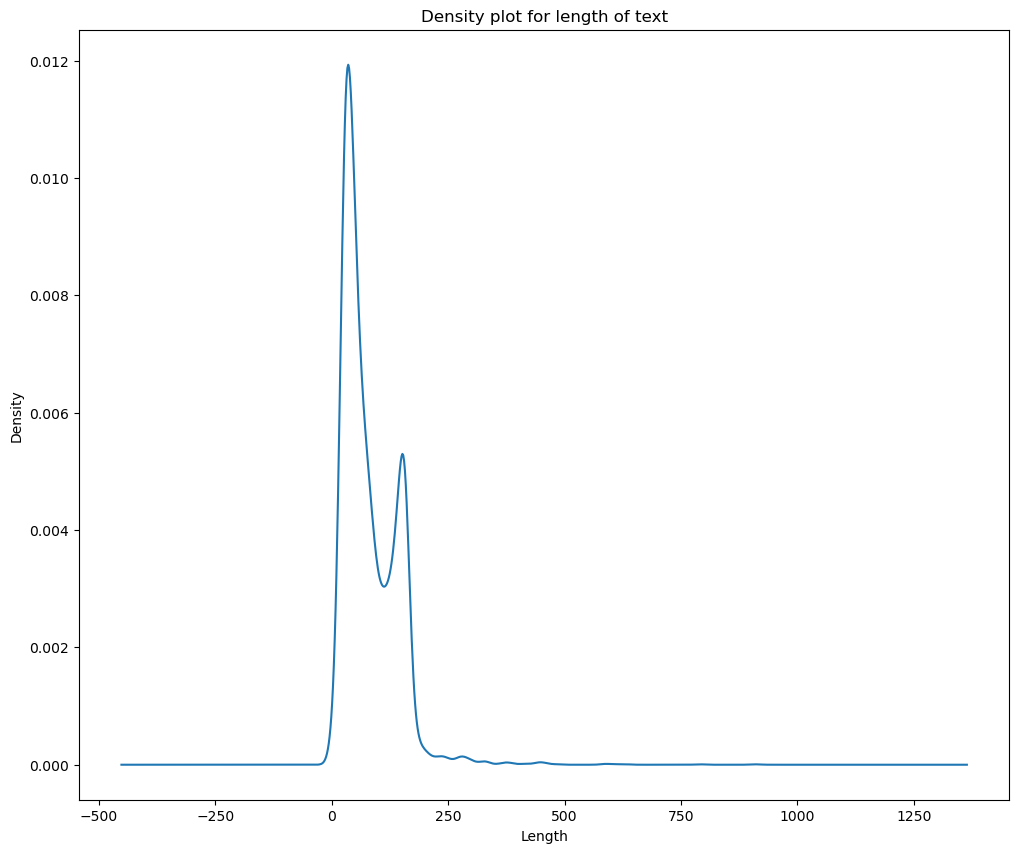

In [9]:
df.length.plot.density()
plt.title('Density plot for length of text')
plt.xlabel('Length')

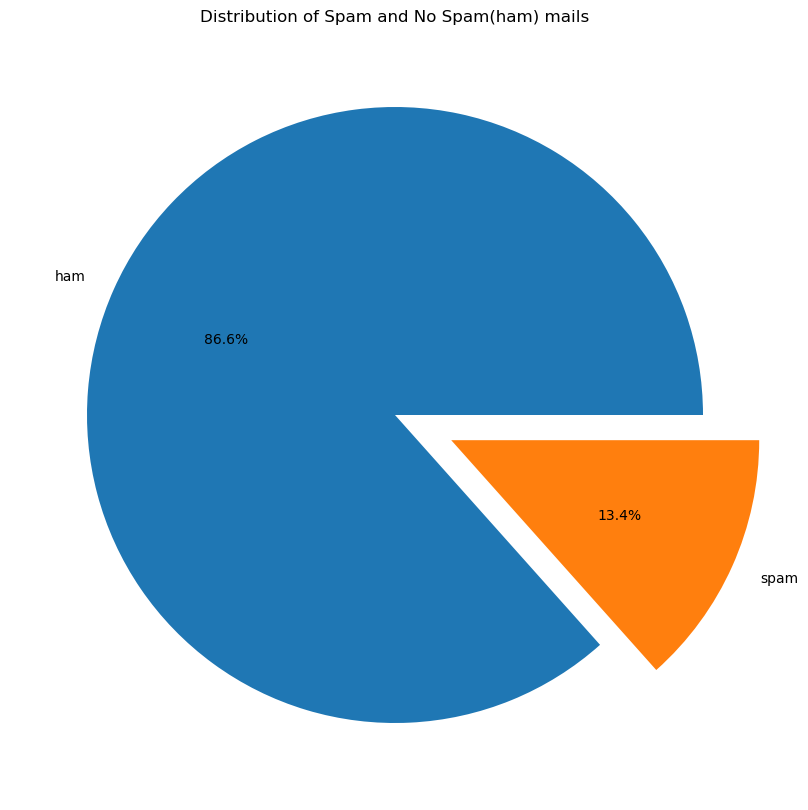

In [10]:
plt.pie(df['label'].value_counts(),labels=df['label'].unique(),autopct='%0.1f%%',explode=[0,0.2])
plt.title('Distribution of Spam and No Spam(ham) mails')
plt.show()

In [11]:
text_lst=df['text'].tolist()

In [12]:
import re      # Regex
import nltk    # Natural Language Toolkit
nltk.data.path = [r'C:\Users\KIIT\anaconda3\nltk_data']
from nltk.corpus import stopwords    # Words like the, a
from nltk.stem.porter import PorterStemmer   # Making all stem words in present tense


def tuning_sen(texts):
    corpus = []
    for i in range(0, len(texts)):
        mail = re.sub('[^a-zA-Z]', ' ', texts[i])
        mail = mail.lower()
        mail = mail.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        #all_stopwords.remove('OK')   # Otherwise it was removing and this is essential
        mail = [ps.stem(word) for word in mail if not word in set(all_stopwords)]
        mail = ' '.join(mail)
        corpus.append(mail)
    return corpus

In [13]:
lst=tuning_sen(text_lst)

In [14]:
lst

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [15]:
df['fined_text']=lst

In [16]:
df['fined_text_len']=df['fined_text'].apply(len)
df

,label,text,length,fined_text,fined_text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,nd time tri contact u u pound prize claim easi...,78
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home,21
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest,17
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...,65


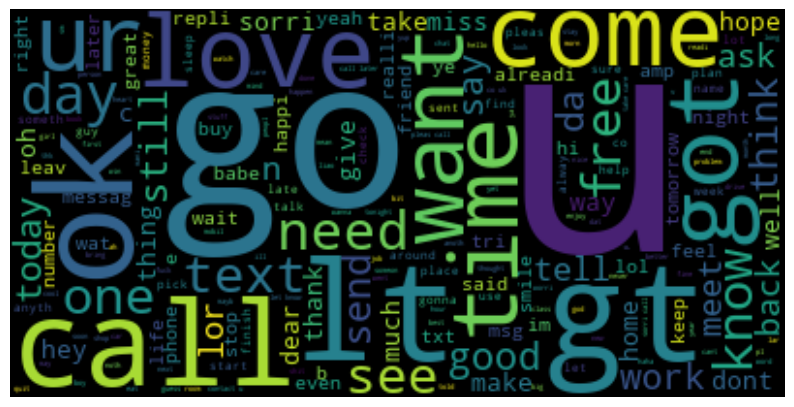

In [17]:
# Overall WordCloud 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
# Create a WordCloud object
wordcloud = WordCloud().generate(" ".join(lst))

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


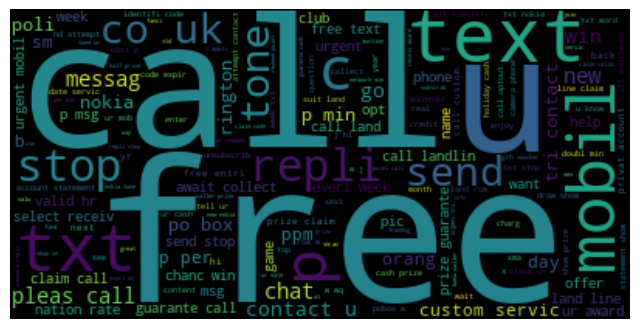

In [18]:
# Spam WordCloud
spam_wc = wordcloud.generate(df[df['label'] == 'spam']['fined_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

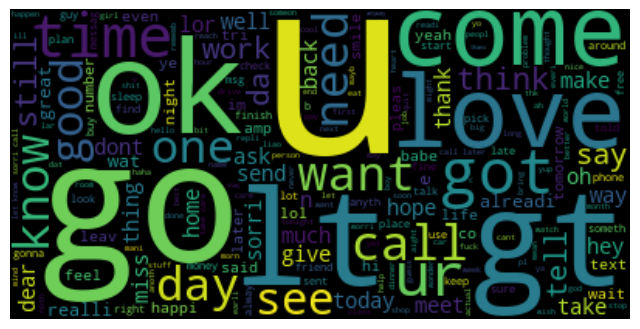

In [19]:
# No Spam WordCloud
n_spam_wc = wordcloud.generate(df[df['label'] == 'ham']['fined_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(n_spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Model

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)    # max length of sparse matrix
X = cv.fit_transform(df['fined_text']).toarray()
y = df.iloc[:, 0].values

In [21]:
len(X[0]) # Before giving max_features it was giving 6221

5000

In [22]:
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object))

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

#### ham=0; spam=1

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [25]:
X_train.shape

(3900, 5000)

In [26]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [27]:
clfs={
    "Gaussian":gnb,
    "Bernoulli":bnb,
    "Multinomial":mnb,
    "XGB":xgb
}

In [28]:
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)
    f1=f1_score(y_test, y_pred, average='macro')
    
    return accuracy,precision,confusion_mat,f1

In [29]:
accuracy_scores = []
precision_scores = []
confusion_matrices = []  # TN FP and FN TP
f1=[]

for name,clf in clfs.items():
    current_accuracy,current_precision,current_confusion,f1_S = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("\n\nFor ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1_Score - ",f1_S)
    print("Confusion Matrix:")
    print(current_confusion)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    confusion_matrices.append(current_confusion)
    f1.append(f1_S)



For  Gaussian
Accuracy -  0.8791866028708134
Precision -  0.7582857234949516
F1_Score -  0.7985085489971483
Confusion Matrix:
[[1264  180]
 [  22  206]]


For  Bernoulli
Accuracy -  0.9826555023923444
Precision -  0.9798359535201641
F1_Score -  0.9618312618716442
Confusion Matrix:
[[1439    5]
 [  24  204]]


For  Multinomial
Accuracy -  0.9838516746411483
Precision -  0.9603503161136528
F1_Score -  0.9661564596526134
Confusion Matrix:
[[1427   17]
 [  10  218]]


For  XGB
Accuracy -  0.9808612440191388
Precision -  0.9869591436755616
F1_Score -  0.9569581068774999
Confusion Matrix:
[[1443    1]
 [  31  197]]


### As XGB has low value for False Positive in Confusion Matrix i.e. the number of non-spam emails incorrectly classified as spam. <br> We'll prioritize this over other metrics so that important mail does not mark as spam.


# Training XGB as final Model

In [30]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [31]:
y_pred = xgb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1443    1]
 [  31  197]]


0.9808612440191388

# Testing with new Mail

In [33]:
new_mail = ['''You have a free voucher. Call at this and pay some advance.''']
fined_mail=tuning_sen(new_mail)
print(fined_mail)
new_X_test = cv.transform(fined_mail).toarray()
new_y_pred =xgb.predict(new_X_test)
print('Spam' if new_y_pred==[1] else 'Not a Spam')

['free voucher call pay advanc']
Not a Spam


In [34]:
new_mail = ['''Greetings to ASPIRANTS,
Are you looking to kick off your journey to success in the summer of 2023? If yes, then here is some really exciting news from us!

We are pleased to share with you that our company, TEACHNOOK, is collaborating with Wissenaire (IIT Bhubaneswar) to offer a unique 2-month Training + Internship  Program. This advanced program will provide you with the missing practical skills that you need to enhance your career.


                           INTERESTED STUDENTS FILL THE GOOGLE FORM.IF YOU ARE SHORTLISTED
                                        YOU WILL BE GETTING A CALL FROM OUR HR TEAM
                 
                                         https://forms.gle/GNjWVxA7oVaUCWWj6  
Join our WhatsApp group for more details :  https://chat.whatsapp.com/CLoukvZFhzh7FrlSEBlarA   


🟡 FIRST MONTH & SECOND MONTH ( 6 weeks )

The combination of theoretical training sessions and practical projects is an effective way to ensure that students not only understand the concepts they are learning but also know how to apply them in real-world situations. It's great to hear that the program offers 10+ practical projects, as this will provide ample opportunities for students to gain hands-on experience and develop their skills.

Congratulations on successfully completing the 6 week of the program. Now it's time to tackle the second month of your coursework.

🟡 SECOND MONTH ( 7 th & 8th Week )
You must be looking forward to the second month, where, apart from virtual and real-world learning tools, you can also participate in the Capstone project. This project will involve solving a real-world, industry issue for a genuine company – giving you the opportunity to gain invaluable industry experience and create a distinct project to showcase on your resume.

And also You'll be having a Mentor from the same MNC , he'll be guiding you in each and every moment of your Internship period

🟡 Access to our growth community for further Stipend-Based Internship Opportunities.

Certifications:-
🎓 Internship Completion certificate from MNC collaboration with Teachnook
🎓 Course completion certificate from IIT BHUBANESHWAR.(Wissenaire)
🎓 Course completion certificate from ULTIMATE GURUS

BENEFITS 🎓

✅ LMS PORTAL ACCESS ( 6 MONTHS )🖥️
✅ RESUME BUILDING📑
✅ INTERVIEW PREPARATION AND BE JOB READY🧑🏻‍💻
✅ PLACEMENT OPPORTUNITY ( 200+ MNC's + Top Startups )💼
✅ LIVE CASE STUDY EXPLANATION📰
✅ CAREER COUNSELING 📈
✅ LIVE Q&A.

Thanks and Regards
Teachnook EdTech''']
fined_mail=tuning_sen(new_mail)
print(fined_mail)
new_X_test = cv.transform(fined_mail).toarray()
new_y_pred =xgb.predict(new_X_test)
print('Spam' if new_y_pred==[1] else 'Not a Spam')

['greet aspir look kick journey success summer ye realli excit news us pleas share compani teachnook collabor wissenair iit bhubaneswar offer uniqu month train internship program advanc program provid miss practic skill need enhanc career interest student fill googl form shortlist get call hr team http form gle gnjwvxa ovaucwwj join whatsapp group detail http chat whatsapp com cloukvzfhzh frlseblara first month second month week combin theoret train session practic project effect way ensur student understand concept learn also know appli real world situat great hear program offer practic project provid ampl opportun student gain hand experi develop skill congratul success complet week program time tackl second month coursework second month th th week must look forward second month apart virtual real world learn tool also particip capston project project involv solv real world industri issu genuin compani give opportun gain invalu industri experi creat distinct project showcas resum als

# Deploying

In [35]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Save the ColumnTransformer object
with open('preprocess.pkl', 'wb') as f:
    pickle.dump(tuning_sen, f)
    
with open('cv.pkl','wb') as f:
    pickle.dump(cv, f)

In [36]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False